### Data Analysis Department.
### Spotahome

##### We have been requested by product manager for a report which shows some statistics of booking state and apartment type for each city from 2014 until nowdays so they can decide which city is more interesting to buy new rentable units.
#####  Product manager is also interested in knowing which is the most booked city and how apartments booking has evolved in this city in the last two years looking at rooms number and how is the distribution of booking states along the last four years to see if there is seasonality in data behavior. 

##### First of all, we load csv files as pandas dataframes and take a look to data structure

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rentable_units = pd.read_csv('C:/Users/LDAAHO/Desktop/Spotahome/rentable_units.csv', sep=',')

rentable_units.head()

,unit_id,property_id,country,city,n_room_to_rent,apartment_type,publication_date
0,0313af760d64514c76668eb8bb7ee3e3,b36d33eaae446f30c4c8a9128e217dc1,country_0,city_0,1,room_shared,1970-01-01 00:00:00.000
1,c55cee4cb418452a98b8156e54f80313,47bb46c0eab9a2af7566a87c24321187,country_1,city_1,1,room_shared,1970-01-01 00:00:00.000
2,fcda0359a73b6694026d3429d7501728,faa9f84ae6a8e01afd6de5666312d7a2,country_2,city_2,1,apartment,1970-01-01 00:00:00.000
3,ce4bed9feec6d667331af56c2ed5b216,5c972c5490a71d7af324d0020476cbb1,country_0,city_0,1,room_shared,2016-10-16 02:21:12.000
4,f9b9a86b000ad81f6be5143f7795faa4,eec93d30908bd873b8677f421e8e29be,country_3,city_3,1,room_shared,1970-01-01 00:00:00.000


In [3]:
bookings = pd.read_csv('C:/Users/LDAAHO/Desktop/Spotahome/bookings.csv', sep=',')

bookings.head()

,booking_id,unit_id,check_in_date,check_out_date,booking_lead_date,booking_request_date,last_date,last_state
0,000c74469bd60198ca0bb5631e82b47c,ac734ecd7f73a3cb59cdfeed1f2e0b8b,2017-09-01 00:00:00,2017-12-31 00:00:00,2017-08-28 11:47:53,2017-08-28 11:49:40,2017-08-28 14:32:22,Booking
1,001410d998eec5bc4862bdc0b83ed3aa,2e458d3a11ed6f80afd50599b797879b,2017-09-10 00:00:00,2018-02-11 00:00:00,2017-05-30 11:37:41,2017-05-30 11:39:21,2017-06-01 10:40:48,BookingRequest
2,0014581ab5fef5ce8c678083c8248708,fd1764f21ce533cc362d9938d39b5d6e,2017-10-10 00:00:00,2018-07-31 00:00:00,2017-09-18 07:31:36,2017-09-18 07:32:46,2017-09-19 14:28:39,TenantCancel
3,0015a8e833e21e03bc52bf414dcb790a,63b2022f9abea50e41420e83903e4306,2018-01-13 17:09:27,2018-04-28 17:09:27,2017-10-25 19:47:10,2017-11-04 17:09:28,2017-11-06 08:28:54,TenantCancel
4,0015c865dce8a80c200f23269c895f0f,283310c7efc249b1bd5250b0dad4ae64,2017-10-16 00:00:00,2018-06-14 00:00:00,2017-10-08 19:17:43,2017-10-08 19:18:46,2017-10-09 15:45:27,TenantCancel


##### Now, we merge both dataframes by unit_id so we can use all information in one unified table. Most of variables are dates, id's or qualitative variables therefore it has no sense looking for outliers. We could found empty data in any of two dataframes so we do inner join and only take registers with data in both dataframes (we are not interested in data without booking state information).

In [4]:
df1 = pd.merge(rentable_units, bookings, how='inner', on='unit_id')
df1.head()

,unit_id,property_id,country,city,n_room_to_rent,apartment_type,publication_date,booking_id,check_in_date,check_out_date,booking_lead_date,booking_request_date,last_date,last_state
0,94d6e5bceb14bcce416f2d164f8050f2,ead6beaa36331665452ca75b4baa0177,country_1,city_1,1,room_shared,2016-07-01 09:48:18.000,5970712e0b7a5aa7447221eb3d709a46,2017-07-01 00:00:00,2017-09-30 00:00:00,2017-06-17 19:43:28,2017-06-17 19:46:31,2017-06-22 17:35:16,TenantCancel
1,cdbbe902c7386241c0a74cf0ca934412,37f0fd2075f1248abf85116de3152013,country_5,city_6,1,room_shared,2016-04-05 09:10:21.000,9545712b7cc6b98ff60b2fdac923cbcd,2017-11-01 00:00:00,2018-02-28 00:00:00,2017-08-24 13:57:35,2017-08-24 13:58:48,2017-08-28 19:20:23,Booking
2,cdbbe902c7386241c0a74cf0ca934412,37f0fd2075f1248abf85116de3152013,country_5,city_6,1,room_shared,2016-04-05 09:10:21.000,bad4764d5064d54506042223f81d8b43,2017-06-23 00:00:00,2017-10-31 00:00:00,2017-05-25 21:19:52,2017-05-25 21:24:55,2017-05-26 08:33:22,Booking
3,ed1be91d4ddd7fd195fa959c54a97170,fd57dbe3cfb5f43f93c1d4a261da8626,country_0,city_7,1,room_shared,2016-06-24 16:19:55.000,e69683038005d16822a8c42866eb27c0,2017-09-01 12:00:00,2017-12-31 12:00:00,2017-04-04 18:30:52,2017-04-05 18:30:52,2017-04-05 18:33:28,BookingRequest
4,97ada3899ffea4d534963c83e2917f4f,97ada3899ffea4d534963c83e2917f4f,country_3,city_3,2,apartment,2015-01-28 20:13:37.000,30e9203d306d05406a25a5227e8ea20d,2017-10-03 00:00:00,2017-12-22 00:00:00,2017-10-01 16:22:37,2017-10-01 16:24:00,2017-10-02 12:12:26,TenantCancel


##### We add month and year columns from last_date variable to see booking state behavior along the time

In [5]:
df1['month'] = pd.DatetimeIndex(df1['last_date']).month
df1['year'] = pd.DatetimeIndex(df1['last_date']).year

##### We can see apartment types booked per year

In [18]:
booked = df1[df1['last_state']=='Booking']
annual_booked = booked.groupby(['year','apartment_type'])['apartment_type'].count()
annual_booked.head(15)

year  apartment_type
2014  apartment            5
      studio               4
2015  apartment           19
      studio              23
2016  apartment          113
      room_shared          1
      studio              92
2017  apartment          751
      residence            8
      room_shared       1545
      studio             535
2018  apartment          210
      residence            2
      room_shared        333
      studio             131
Name: apartment_type, dtype: int64

##### Now we calculate some contingency tables to see how is the frequency dsitribution of the booking state for each country, city and apartment type and how is distributed rentable_units by country.

In [6]:
pd.crosstab(df1.country, df1.apartment_type)

apartment_type,apartment,residence,room_shared,studio
country,,,,
country_0,434,5,684,244
country_1,27,0,240,42
country_10,0,0,1,0
country_2,175,2,45,312
country_3,1266,12,2309,499
country_4,118,0,152,125
country_5,204,5,215,194
country_6,0,0,6,1
country_7,36,0,220,8


In [7]:
pd.crosstab(df1.apartment_type, df1.last_state)

last_state,Booking,BookingRequest,LandlordReject,TenantCancel
apartment_type,,,,
apartment,1098,72,378,747
residence,10,3,3,8
room_shared,1879,218,297,1479
studio,785,48,227,386


In [8]:
pd.crosstab(df1.country, df1.last_state)

last_state,Booking,BookingRequest,LandlordReject,TenantCancel
country,,,,
country_0,688,50,159,470
country_1,153,12,35,109
country_10,1,0,0,0
country_2,233,19,93,189
country_3,2004,213,446,1423
country_4,170,8,50,167
country_5,378,33,71,136
country_6,0,0,1,6
country_7,127,3,34,100


In [9]:
pd.crosstab(df1.city, df1.last_state)

last_state,Booking,BookingRequest,LandlordReject,TenantCancel
city,,,,
city_0,361,17,76,236
city_1,153,12,35,109
city_10,44,4,12,44
city_11,127,3,34,100
city_12,260,21,46,166
city_13,15,3,14,20
city_14,10,0,2,1
city_15,47,1,17,27
city_16,29,2,6,20


##### We can also group data by city, apartment type and booking state to view all information in one shot. So, we can check city_5 is most booked city with 982 bookings

In [10]:
df2 = df1.groupby(['city','apartment_type','last_state'])['last_state'].count()
df2.loc['city_5']

apartment_type  last_state    
apartment       Booking           274
                BookingRequest     27
                LandlordReject    108
                TenantCancel      196
residence       LandlordReject      3
                TenantCancel        2
room_shared     Booking           546
                BookingRequest     72
                LandlordReject     81
                TenantCancel      417
studio          Booking           162
                BookingRequest     17
                LandlordReject     35
                TenantCancel       58
Name: last_state, dtype: int64

##### Since we have been asked for apartments booking behavior in this city in last two years by rooms number, we filter grouped data by last two years to see how many bookings correspond to apartments in city_5

In [11]:
y16 = df1[df1['year']==2016]
df2 = y16.groupby(['city','apartment_type','last_state'])['last_state'].count()
df2.loc['city_5']

apartment_type  last_state    
apartment       Booking           34
                LandlordReject     5
                TenantCancel       4
room_shared     BookingRequest     2
studio          Booking           23
                LandlordReject     3
                TenantCancel       2
Name: last_state, dtype: int64

In [12]:
y17 = df1[df1['year']==2017]
df2 = y17.groupby(['city','apartment_type','last_state'])['last_state'].count()
df2.loc['city_5']

apartment_type  last_state    
apartment       Booking           178
                BookingRequest     25
                LandlordReject     67
                TenantCancel      142
residence       LandlordReject      3
                TenantCancel        2
room_shared     Booking           451
                BookingRequest     67
                LandlordReject     62
                TenantCancel      344
studio          Booking           103
                BookingRequest     17
                LandlordReject     22
                TenantCancel       42
Name: last_state, dtype: int64

##### Furthermore we want see this information grouped by rooms number per year

In [13]:
p1 = df1[(df1.city=='city_5') & (df1.last_state=='Booking') & (df1.year==2016)]
pd.crosstab(p1.n_room_to_rent, p1.apartment_type)

apartment_type,apartment,studio
n_room_to_rent,,
0,0,23
1,22,0
2,7,0
3,5,0


In [14]:
p2 = df1[(df1.city=='city_5') & (df1.last_state=='Booking') & (df1.year==2017)]
pd.crosstab(p2.n_room_to_rent, p2.apartment_type)

apartment_type,apartment,room_shared,studio
n_room_to_rent,,,
0,0,0,103
1,109,451,0
2,55,0,0
3,14,0,0


##### Therefore we can plot data using pie chart to visualize information in a more explicit way

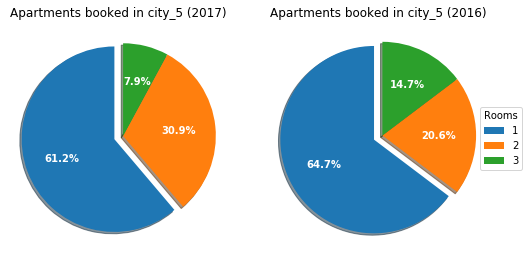

In [17]:
# Data from 2017

labels = ['1', '2', '3']
fracs = [61.2, 30.9, 7.9]
explode = (0.1, 0, 0)

f,(ax1,ax2) = plt.subplots(1,2)

ws,texts, autotexts=ax1.pie(fracs,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
                                textprops=dict(color="w"))

plt.setp(autotexts, size=10, weight="bold")

plt.legend(ws, labels,
          title="Rooms",
          loc="center left",
          bbox_to_anchor=(0.95, 0, 1, 1))

ax1.axis('equal')
ax1.set_title("Apartments booked in city_5 (2017)")

# Data from 2016

fracs = [64.7, 20.6, 14.7]
ws,texts, autotexts=ax2.pie(fracs,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
                                textprops=dict(color="w"))

plt.setp(autotexts, size=10, weight="bold")
ax2.axis('equal')
ax2.set_title("Apartments booked in city_5 (2016)")

f.subplots_adjust(-0.1,0,1,0.8)
plt.show()

##### As we can see in plots, the number of apartments booked with one and three rooms decrease in 2017 with regard to 2016, meanwhile apartments with two rooms increase, so it seems that we should buy two rooms apartments in city_5 (after check 2018 data for all the whole year when we have that information )

##### We can also check which is the most frequent state of the booking

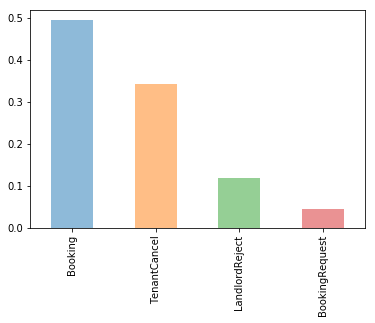

In [19]:
df1.last_state.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.show()

##### and most booked apartment type 

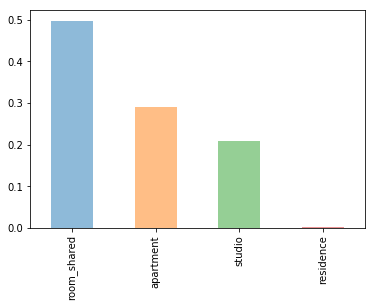

In [20]:
df1.apartment_type[df1.last_state=='Booking'].value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.show()

##### Moreover we can see distribution of states of the booking per city

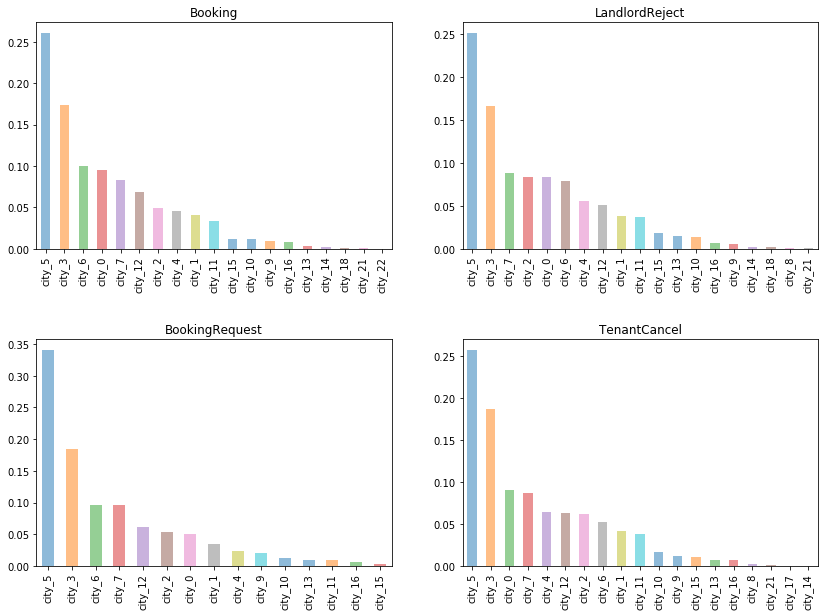

In [21]:
fig = plt.figure(figsize=(14,10))
states = ['Booking', 'LandlordReject', 'BookingRequest', 'TenantCancel']

i = 221

for state in states:
    plt.subplot(i)
    df1.city[df1.last_state==state].value_counts(normalize=True).plot(kind='bar', alpha=.5)
    plt.title(state)
    i+=1

plt.subplots_adjust(hspace=.4)
plt.show()

##### It seems that city_5 and city_3 have the most of the booking request

##### Finally, we are interested in studying seasonality for states of the booking along the last four years so we can decide which are the best months to make advertising campaigns to increase the number of bookings and avoid months with high number of tenant cancellations or landlord rejects.

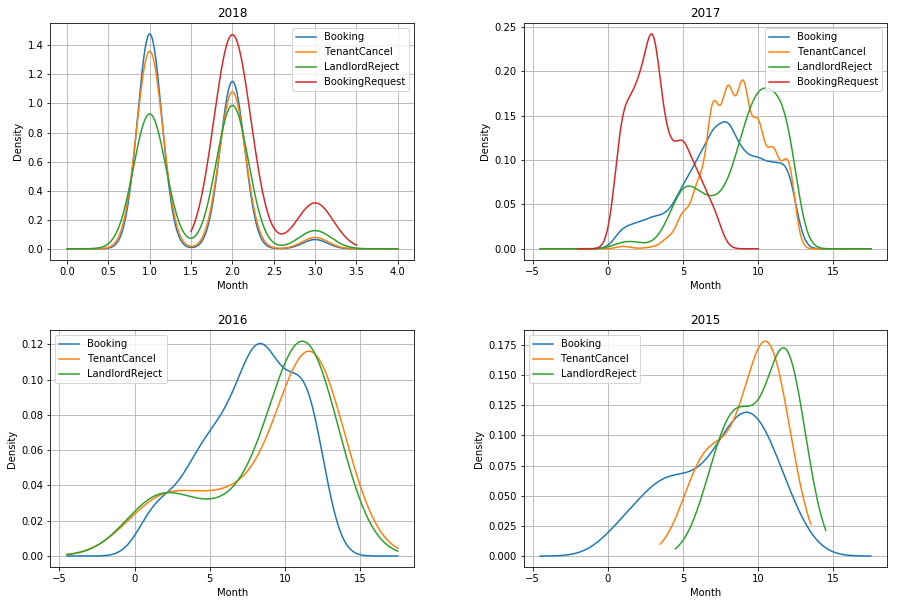

In [22]:
states = ['Booking', 'TenantCancel', 'LandlordReject', 'BookingRequest']

fig = plt.figure(figsize=(15,10))

years = [2018, 2017, 2016, 2015]

i = 221

for year in years:
    
    df2 = df1[df1['year'] == year]
    if year < 2017:
        states = states[0:3]
    plt.subplot(i)
    for state in states:
        df2.month[df1.last_state == state].plot(kind = 'kde')
    i+=1
            
    plt.legend(('Booking', 'TenantCancel', 'LandlordReject', 'BookingRequest'), loc=0)
    plt.xlabel('Month')
    plt.ylabel('Density')
    plt.grid(True)
    plt.title(year)
    
plt.subplots_adjust(hspace=.3, wspace=.3)
plt.show()

##### As we can see in plots, it is inferred that the most of bookings are made in summer months except in 2018 where bookings are concentrated in January and February because we only have information for first quarter.
##### In 2017 most of booking request are made in spring months, while there are more tenant cancellations than bookings in summer months.
##### In 2015 and 2016 there is not enough data of booking request to plot it, but we can see that the most of tenant cancellations and landlord rejects are made in October and November.
##### Therefore, bookings increase in summer every year and then begin to decrease until the end of the year while tenant cancellations and landlord rejects have the maximum in autumn months. So we should have as many operative rentable units as possible in summer, especially room shared in city_5 and city_3.